In [1]:
import imageio

img_arr = imageio.imread("data/p1ch4/image-dog/bobby.jpg")
img_arr.shape

/tmp/ipykernel_11065/3205341772.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread("data/p1ch4/image-dog/bobby.jpg")


(720, 1280, 3)

In [2]:
img_arr

Array([[[ 77,  45,  22],
        [ 77,  45,  22],
        [ 78,  46,  21],
        ...,
        [118,  78,  52],
        [117,  77,  51],
        [116,  76,  50]],

       [[ 75,  43,  20],
        [ 76,  44,  21],
        [ 77,  45,  20],
        ...,
        [118,  78,  52],
        [117,  77,  51],
        [116,  76,  50]],

       [[ 74,  39,  17],
        [ 75,  40,  18],
        [ 77,  43,  18],
        ...,
        [117,  80,  51],
        [117,  78,  49],
        [116,  77,  48]],

       ...,

       [[215, 165,  78],
        [216, 166,  79],
        [217, 167,  80],
        ...,
        [174, 121,  51],
        [176, 123,  53],
        [176, 123,  53]],

       [[215, 165,  78],
        [216, 166,  79],
        [217, 167,  80],
        ...,
        [173, 123,  54],
        [174, 124,  55],
        [174, 124,  55]],

       [[215, 165,  78],
        [216, 166,  79],
        [217, 167,  80],
        ...,
        [159, 109,  40],
        [158, 107,  41],
        [158, 107,  41]]

In [5]:
import torch

img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1) # change HxWxC to CxHxW
out

tensor([[[ 77,  77,  78,  ..., 118, 117, 116],
         [ 75,  76,  77,  ..., 118, 117, 116],
         [ 74,  75,  77,  ..., 117, 117, 116],
         ...,
         [215, 216, 217,  ..., 174, 176, 176],
         [215, 216, 217,  ..., 173, 174, 174],
         [215, 216, 217,  ..., 159, 158, 158]],

        [[ 45,  45,  46,  ...,  78,  77,  76],
         [ 43,  44,  45,  ...,  78,  77,  76],
         [ 39,  40,  43,  ...,  80,  78,  77],
         ...,
         [165, 166, 167,  ..., 121, 123, 123],
         [165, 166, 167,  ..., 123, 124, 124],
         [165, 166, 167,  ..., 109, 107, 107]],

        [[ 22,  22,  21,  ...,  52,  51,  50],
         [ 20,  21,  20,  ...,  52,  51,  50],
         [ 17,  18,  18,  ...,  51,  49,  48],
         ...,
         [ 78,  79,  80,  ...,  51,  53,  53],
         [ 78,  79,  80,  ...,  54,  55,  55],
         [ 78,  79,  80,  ...,  40,  41,  41]]], dtype=torch.uint8)

In [9]:
out.shape

torch.Size([3, 720, 1280])

Try batch image

In [10]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)
batch

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0

Load all image from directory and store them as tensor

In [11]:
import os

data_dir = "data/p1ch4/image-cats/"
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']

for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3]
    batch[i] = img_t

/tmp/ipykernel_11065/1562226302.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(data_dir, filename))


# Normalizing Data

Neural networks usually work with floating-point tensors as their input. Neural networks exhibit the best training performance when the input data ranges roughly from 0 to 1, or from -1 to 1 (this is an effect of how their building blocks are defined). So a typical thing we’ll want to do is cast a tensor to floating-point and normalize the values of the pixels. Casting to floating-point is easy, but normalization is trickier, as it depends on what range of the input we decide should lie between 0 and 1 (or -1 and 1). One possibility is to just divide the values of the pixels by 255 (the maximum representable number in 8-bit unsigned):

In [12]:
batch = batch.float()
batch

tensor([[[[202., 193., 190.,  ...,  13.,  13.,  12.],
          [199., 192., 189.,  ...,  14.,  14.,  14.],
          [198., 193., 188.,  ...,  12.,  12.,  12.],
          ...,
          [ 93.,  82.,  76.,  ...,  36.,  36.,  36.],
          [ 75.,  68., 101.,  ...,  36.,  36.,  37.],
          [ 85., 103.,  90.,  ...,  36.,  37.,  38.]],

         [[151., 139., 133.,  ...,   9.,   9.,   8.],
          [151., 140., 134.,  ...,  11.,  11.,  11.],
          [152., 143., 134.,  ...,  11.,  11.,  11.],
          ...,
          [ 57.,  45.,  39.,  ...,  26.,  26.,  26.],
          [ 33.,  26.,  59.,  ...,  26.,  26.,  27.],
          [ 40.,  58.,  45.,  ...,  26.,  27.,  28.]],

         [[ 68.,  53.,  44.,  ...,   6.,   6.,   5.],
          [ 67.,  54.,  44.,  ...,   6.,   6.,   6.],
          [ 67.,  56.,  44.,  ...,   6.,   6.,   6.],
          ...,
          [ 31.,  19.,  12.,  ...,  17.,  17.,  17.],
          [ 11.,   2.,  35.,  ...,  17.,  17.,  18.],
          [ 19.,  37.,  22.,  ...

In [13]:
batch /= 255.0
batch

tensor([[[[0.7922, 0.7569, 0.7451,  ..., 0.0510, 0.0510, 0.0471],
          [0.7804, 0.7529, 0.7412,  ..., 0.0549, 0.0549, 0.0549],
          [0.7765, 0.7569, 0.7373,  ..., 0.0471, 0.0471, 0.0471],
          ...,
          [0.3647, 0.3216, 0.2980,  ..., 0.1412, 0.1412, 0.1412],
          [0.2941, 0.2667, 0.3961,  ..., 0.1412, 0.1412, 0.1451],
          [0.3333, 0.4039, 0.3529,  ..., 0.1412, 0.1451, 0.1490]],

         [[0.5922, 0.5451, 0.5216,  ..., 0.0353, 0.0353, 0.0314],
          [0.5922, 0.5490, 0.5255,  ..., 0.0431, 0.0431, 0.0431],
          [0.5961, 0.5608, 0.5255,  ..., 0.0431, 0.0431, 0.0431],
          ...,
          [0.2235, 0.1765, 0.1529,  ..., 0.1020, 0.1020, 0.1020],
          [0.1294, 0.1020, 0.2314,  ..., 0.1020, 0.1020, 0.1059],
          [0.1569, 0.2275, 0.1765,  ..., 0.1020, 0.1059, 0.1098]],

         [[0.2667, 0.2078, 0.1725,  ..., 0.0235, 0.0235, 0.0196],
          [0.2627, 0.2118, 0.1725,  ..., 0.0235, 0.0235, 0.0235],
          [0.2627, 0.2196, 0.1725,  ..., 0

Another possibility is to compute the mean and standard deviation of the input data and scale it so that the output has zero mean and unit standard deviation across each channel

In [14]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

# 3D Images

In [15]:
import imageio

dir_path = "data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083/"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%8/99 files (8.1%18/99 files (18.2%28/99 files (28.3%37/99 files (37.4%47/99 files (47.5%57/99 files (57.6%67/99 files (67.7%77/99 files (77.8%87/99 files (87.9%98/99 files (99.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 6/99  (6.116/99  (16.229/99  (29.346/99  (46.575/99  (75.899/99  (100.0%)


(99, 512, 512)

In [16]:
vol_arr

Array([[[ -985,  -990,  -999, ..., -1017, -1008,  -971],
        [-1016,  -984,  -963, ..., -1000, -1009,  -999],
        [-1024, -1008,  -996, ...,  -979, -1021,  -987],
        ...,
        [ -920,  -942,  -944, ...,  -893,  -917,  -955],
        [ -871,  -879,  -905, ...,  -895,  -869,  -867],
        [ -876,  -855,  -873, ...,  -933,  -982,  -936]],

       [[ -982,  -989, -1020, ...,  -988,  -977,  -980],
        [-1015,  -969,  -980, ...,  -981,  -974, -1016],
        [-1020,  -978,  -972, ...,  -988,  -993, -1015],
        ...,
        [ -880,  -854,  -924, ...,  -909,  -829,  -829],
        [ -907,  -868,  -928, ...,  -909,  -901,  -894],
        [ -885,  -850,  -899, ...,  -977,  -964,  -991]],

       [[-1022, -1011,  -983, ..., -1013,  -980,  -967],
        [-1022, -1005, -1012, ...,  -948,  -966, -1008],
        [ -991,  -965,  -993, ...,  -964, -1011,  -996],
        ...,
        [ -858,  -899,  -950, ...,  -939,  -868,  -827],
        [ -948,  -914,  -918, ...,  -968,  -9

In [17]:
med_img = imageio.imread("data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083/000000.dcm")

/tmp/ipykernel_11065/1970037845.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  med_img = imageio.imread("data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083/000000.dcm")


In [18]:
med_img.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2.1'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055'),
      ('StudyDate', '20100227'),
      ('SeriesDate', '20100227'),
      ('AcquisitionDate', '20100227'),
      ('ContentDate', '20100227'),
      ('StudyTime', '161937.171'),
      ('SeriesTime', '162536.14 '),
      ('AcquisitionTime', '162203.028699 '),
      ('ContentTime', '162203.028699 '),
      ('Modality', 'CT'),
      ('Manufacturer', 'SIEMENS'),
      ('StudyDescription', 'CT CHEST W IV CONTRAST'),
      ('SeriesDescription', 'LUNG 3.0  B70f'),
      ('PatientName', 'C3N-00247'),
      ('PatientID', 'C3N-00247'),
      ('PatientBirthDate', ''),
      ('PatientSex', 'F '),
      ('PatientAge', '077Y'),
      ('StudyInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.258626612405225511766549337110'),
      ('SeriesInstanceUID',
       '1.3.6.1.4.1.14519.5.2.1.7085.2626.24

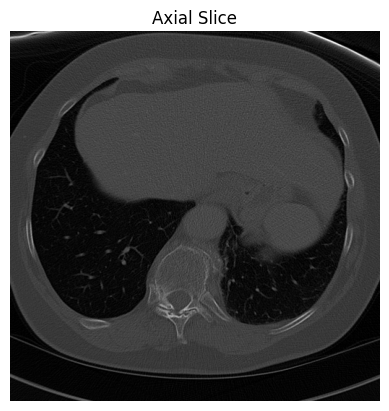

In [19]:
import matplotlib.pyplot as plt

#Show the image with gray color-map
plt.imshow(med_img, cmap='gray')

#Don't show tha axes
plt.axis('off')

#Add a title to the plot
plt.title('Axial Slice')
plt.show()